<a href="https://colab.research.google.com/github/Rohit050798/Projects-/blob/main/Tesla_stock_predicator_RNNModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd  #data processing
import io 
uploaded = files.upload()
df=pd.read_csv(io.BytesIO(uploaded['Tesla.csv']))
print (df.head())

Saving Tesla.csv to Tesla.csv
        Date       Open   High        Low      Close    Volume  Adj Close
0  6/29/2010  19.000000  25.00  17.540001  23.889999  18766300  23.889999
1  6/30/2010  25.790001  30.42  23.299999  23.830000  17187100  23.830000
2   7/1/2010  25.000000  25.92  20.270000  21.959999   8218800  21.959999
3   7/2/2010  23.000000  23.10  18.709999  19.200001   5139800  19.200001
4   7/6/2010  20.000000  20.00  15.830000  16.110001   6866900  16.110001


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df.tail()
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [6]:
length_data = len(df) #Total rows which are available to us
split_ratio = 0.7  # 0.7 = 70% data goes for training and the remaining 30% goes for testing (Validation)
length_train = round(length_data*split_ratio)
length_validation = length_data - length_train
print("============================================")
print("Length of Total data = ",length_data)
print("Length of Train data = ",length_train)
print("Length of Validation data = ",length_validation)
print("============================================")

Length of Total data =  1692
Length of Train data =  1184
Length of Validation data =  508


In [7]:
train_data = df[:length_train].iloc[:,:2]
train_data['Date'] = pd.to_datetime(train_data['Date']) #Converting the column to be of the datetime format (time object)
train_data

,Date,Open
0,2010-06-29,19.000000
1,2010-06-30,25.790001
2,2010-07-01,25.000000
3,2010-07-02,23.000000
4,2010-07-06,20.000000
...,...,...
1179,2015-03-06,199.210007
1180,2015-03-09,194.389999
1181,2015-03-10,188.460007
1182,2015-03-11,191.149994


In [8]:
validation_data = df[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date']) #Converting the column to be of the datetime format (time object)
validation_data

,Date,Open
1184,2015-03-13,188.949997
1185,2015-03-16,192.000000
1186,2015-03-17,195.429993
1187,2015-03-18,194.960007
1188,2015-03-19,202.000000
...,...,...
1687,2017-03-13,244.820007
1688,2017-03-14,246.110001
1689,2017-03-15,257.000000
1690,2017-03-16,262.399994


In [9]:
dataset_train = train_data.Open.values  #Open is the col_name and we are taking the values as an array
dataset_train.shape # We see that due to .Open.values function we are reduced the dimension to be 1D --> (1184,)

(1184,)

In [10]:
#Since this is 1D (1184,) we want it to be a 2D array (1184,1)
# we will use numpy array method to reshape
dataset_train = np.reshape(dataset_train,(-1,1)) #Remember this syntax to convert 1D array to 2D
dataset_train.shape

(1184, 1)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,2)) #We created an object for the MinMaxScaler we have imported

#scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train) #Applying the scaling process to the dataset
print(dataset_train.shape)
print(dataset_train_scaled.shape) #fit_transform will maintain the shape so no need to reshape at this point

(1184, 1)
(1184, 1)


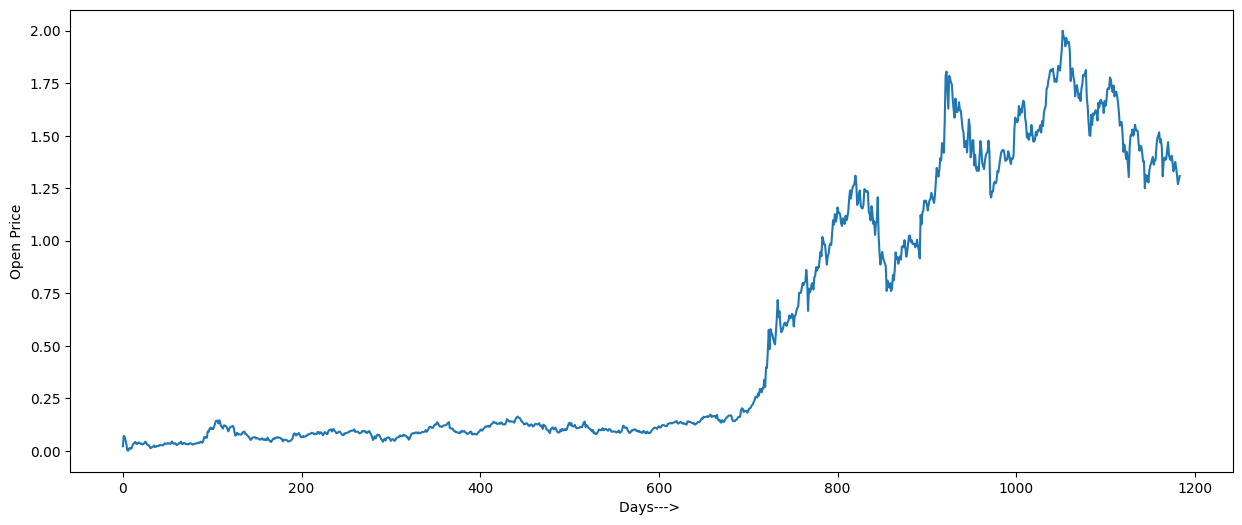

In [12]:
plt.subplots(figsize=(15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days---> ")
plt.ylabel("Open Price")
plt.show()

In [13]:
X_train = [] #We created list here , hence we will convert X_train and Y_train to numpy array after the loop
Y_train = []

time_step = 50 #This is our decided value as a DS, we can later test different numbers here

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    Y_train.append(dataset_train_scaled[i,0])
    
#Converting the lists to numpy arrays
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [14]:
print(X_train.shape)
print(Y_train.shape)
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
Y_train = np.reshape(Y_train, (Y_train.shape[0],1))
print(X_train.shape)
print(Y_train.shape)

(1134, 50)
(1134,)
(1134, 50, 1)
(1134, 1)


In [15]:
#CREATING THE RNN MODEL
from keras.models import Sequential
from keras.layers import Dense   # We use this layer as our output layer
from keras.layers import SimpleRNN  # We create 4 layers using this --> HIDDEN LAYERS PART
from keras.layers import Dropout   # We use dropout layer after each RNN layer --> HIDDEN LAYERS PART

#initialize the RNN
regressor = Sequential()

#Adding the first RNN layer and then use dropout on it to regularize
regressor.add(
    SimpleRNN(units = 50,
              activation='tanh',
              return_sequences= True,
              input_shape = (X_train.shape[1],1)) #SINCE THIS IS THE INPUT LAYER
            )
regressor.add(
    Dropout(0.2)
)

#Adding the second RNN layer and then use dropout on it to regularize
regressor.add(
    SimpleRNN(units = 50,
              activation='tanh',
              return_sequences= True,
             )
            )
regressor.add(
    Dropout(0.2)
)

#Adding the Third RNN layer and then use dropout on it to regularize
regressor.add(
    SimpleRNN(units = 50,
              activation='tanh',
              return_sequences= True,
             )
            )
regressor.add(
    Dropout(0.2)
)

#Adding the Fourth RNN layer and then use dropout on it to regularize
regressor.add(
    SimpleRNN(units = 50
             )
            )
regressor.add(
    Dropout(0.2)
)

# adding the output layer
regressor.add(Dense(units = 1))


# Compiling the model
regressor.compile(
    optimizer="adam",
    loss = "mean_squared_error",
    metrics = ["accuracy"]
)



#Fit the RNN MODEL
history = regressor.fit(X_train, Y_train, epochs=50, batch_size=32)

Epoch 1/50
36/36 [==============================] - 4s 39ms/step - loss: 0.4912 - accuracy: 0.0000e+00
Epoch 2/50
36/36 [==============================] - 1s 37ms/step - loss: 0.2699 - accuracy: 0.0000e+00
Epoch 3/50
36/36 [==============================] - 2s 59ms/step - loss: 0.1968 - accuracy: 0.0000e+00
Epoch 4/50
36/36 [==============================] - 1s 37ms/step - loss: 0.1470 - accuracy: 0.0000e+00
Epoch 5/50
36/36 [==============================] - 1s 38ms/step - loss: 0.1170 - accuracy: 0.0000e+00
Epoch 6/50
36/36 [==============================] - 1s 37ms/step - loss: 0.0981 - accuracy: 0.0000e+00
Epoch 7/50
36/36 [==============================] - 1s 37ms/step - loss: 0.0796 - accuracy: 0.0000e+00
Epoch 8/50
36/36 [==============================] - 1s 37ms/step - loss: 0.0746 - accuracy: 0.0000e+00
Epoch 9/50
36/36 [==============================] - 1s 38ms/step - loss: 0.0662 - accuracy: 0.0000e+00
Epoch 10/50
36/36 [==============================] - 1s 38ms/step - loss:

In [16]:
history.history["loss"]

[0.4912249445915222,
 0.26989713311195374,
 0.19684427976608276,
 0.1470039337873459,
 0.11698085814714432,
 0.09805826097726822,
 0.07956324517726898,
 0.07464893162250519,
 0.06622646003961563,
 0.05822189524769783,
 0.04834859073162079,
 0.041807401925325394,
 0.04706384614109993,
 0.04951614513993263,
 0.03692188113927841,
 0.03993665426969528,
 0.03344273939728737,
 0.032798923552036285,
 0.029146833345294,
 0.028210094198584557,
 0.02722882106900215,
 0.02594592049717903,
 0.02755044586956501,
 0.02098965272307396,
 0.02159164659678936,
 0.02236289530992508,
 0.021810758858919144,
 0.018990810960531235,
 0.021881941705942154,
 0.02003423497080803,
 0.017715387046337128,
 0.018060479313135147,
 0.015464863739907742,
 0.019015014171600342,
 0.018168020993471146,
 0.019470157101750374,
 0.015386631712317467,
 0.01467517763376236,
 0.017404543235898018,
 0.016989734023809433,
 0.015280026011168957,
 0.015605583786964417,
 0.015379490330815315,
 0.016117995604872704,
 0.01735858432948

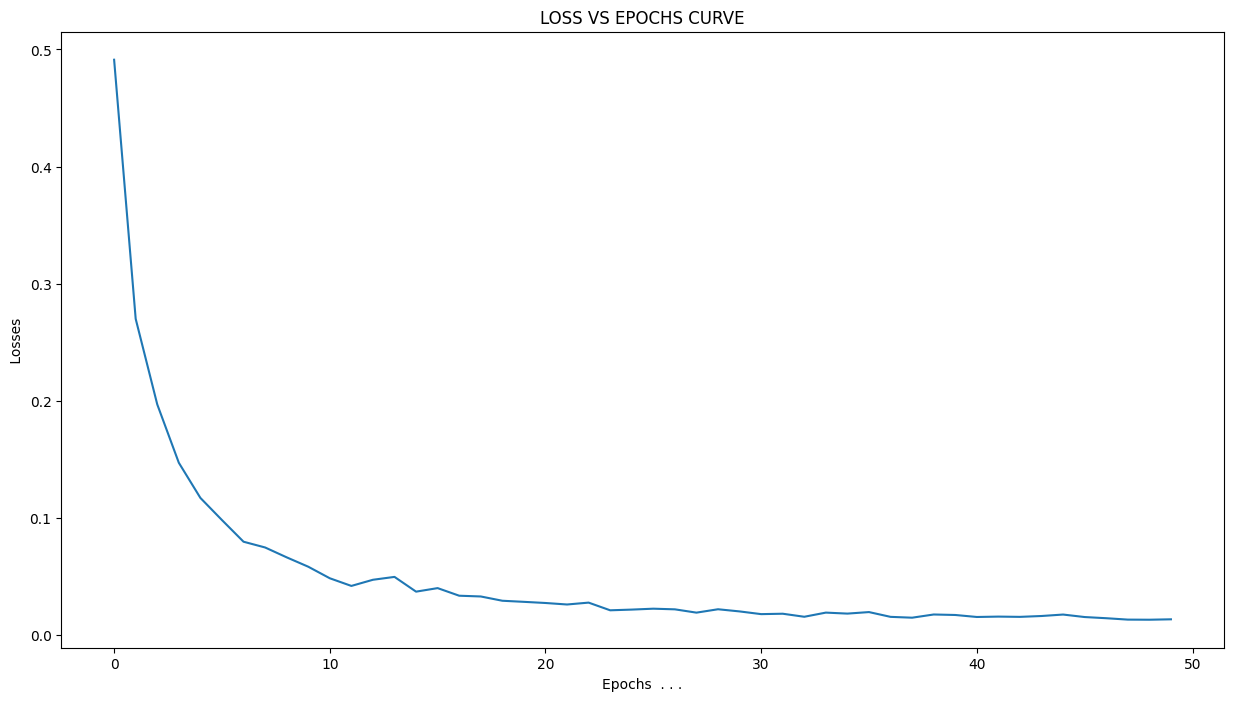

In [17]:
#plotting loss vs epochs
plt.figure(figsize=(15,8))
plt.plot(history.history["loss"])
plt.xlabel("Epochs  . . .")
plt.ylabel(" Losses ")
plt.title("LOSS VS EPOCHS CURVE")
plt.show()

In [18]:
y_pred = regressor.predict(X_train)
y_pred = scaler.inverse_transform(y_pred)
y_pred

36/36 [==============================] - 1s 10ms/step


array([[ 20.358383],
       [ 21.59493 ],
       [ 22.093948],
       ...,
       [233.75528 ],
       [230.21745 ],
       [228.37085 ]], dtype=float32)

In [19]:
y_train = scaler.inverse_transform(Y_train)
y_train

array([[ 21.      ],
       [ 20.75    ],
       [ 20.889999],
       ...,
       [188.460007],
       [191.149994],
       [193.75    ]])

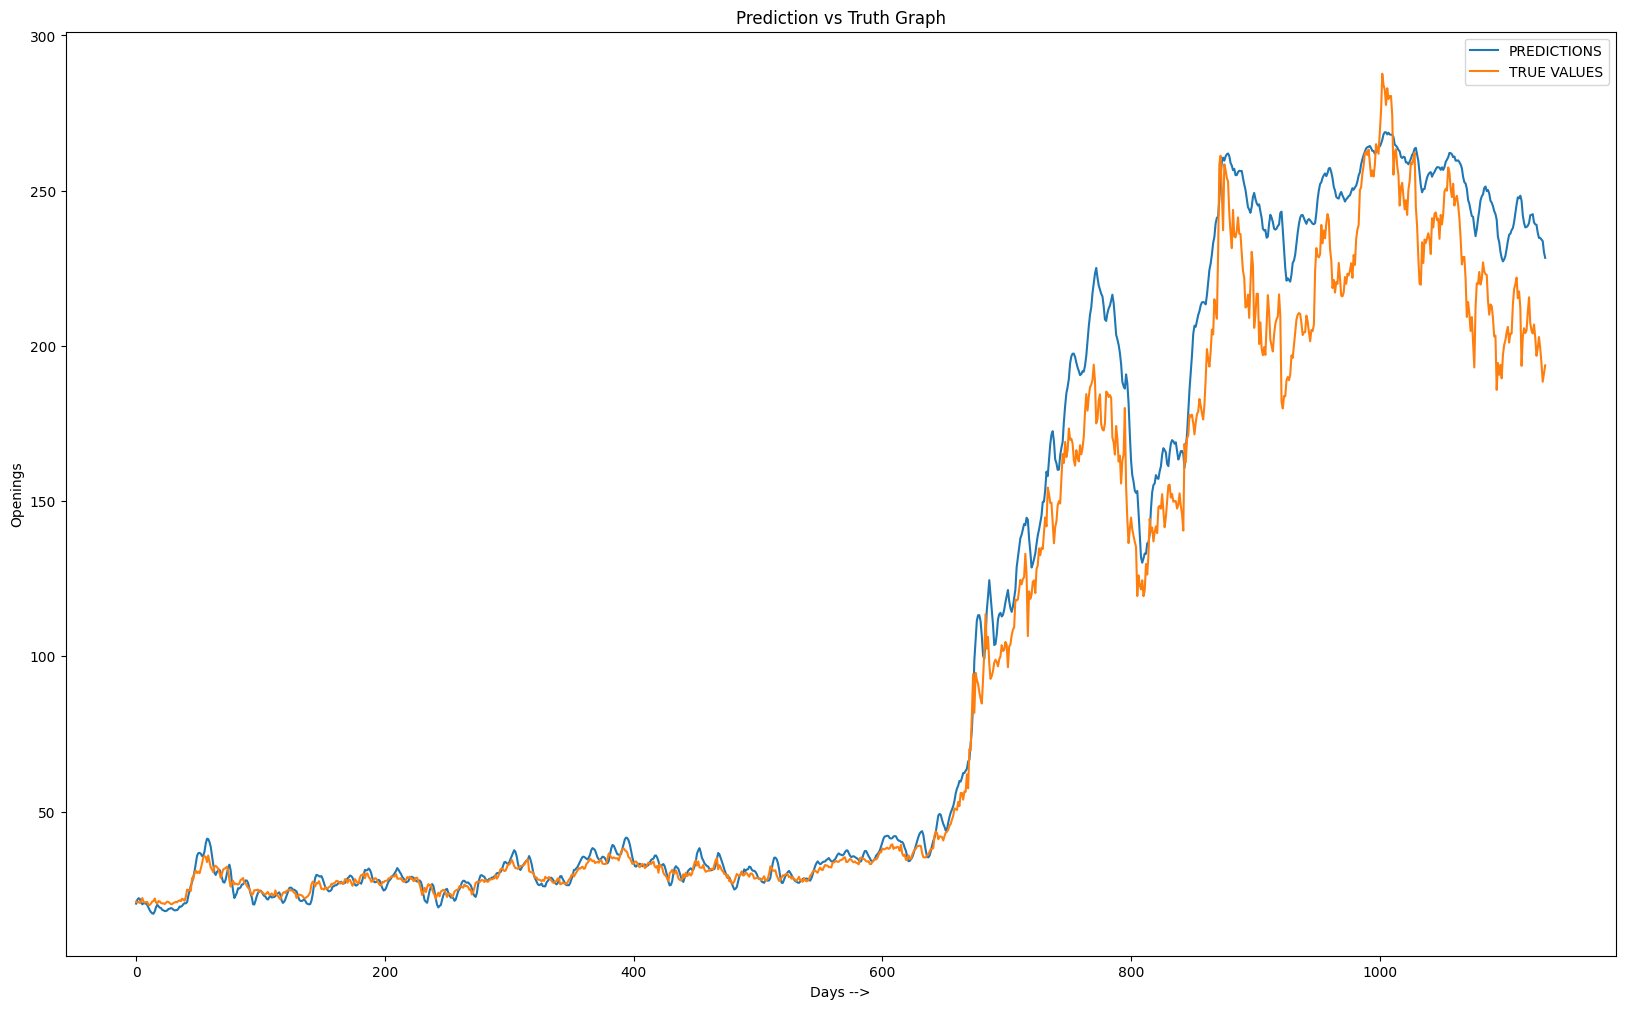

In [21]:
#plotting Predictions vs Truths
plt.figure(figsize=(20,12))
plt.plot(y_pred, label="PREDICTIONS")
plt.plot(y_train, label = "TRUE VALUES")
plt.xlabel("Days -->")
plt.ylabel("Openings")
plt.title("Prediction vs Truth Graph")
plt.legend()
plt.show()